In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### PCA

**Principal Component Analysis(Метод главных компонент)**

In [4]:
#Столбец 0 - колличество комнат
#Столбец 1 - площадь дома (в тысячах квадратных метрах)
houses = np.array([[5,1.6],
                 [4,1.4],
                 [6,1.9],
                 [3,1.1],
                 [4,1.25]])

Text(0, 0.5, 'Площадь')

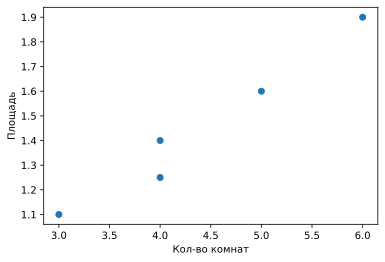

In [5]:
plt.scatter(houses[:,0],houses[:,1])
plt.xlabel('Кол-во комнат')
plt.ylabel('Площадь')

#### Алгоритм PCA

In [7]:
houses

array([[5.  , 1.6 ],
       [4.  , 1.4 ],
       [6.  , 1.9 ],
       [3.  , 1.1 ],
       [4.  , 1.25]])

Найдем среднее значение для каждого признака

In [12]:
mean_values = np.mean(houses,axis=0)
mean_values

array([4.4 , 1.45])

Отнимем от значений признаков среднее значение

In [14]:
houses_centered = houses - mean_values
houses_centered

array([[ 0.6 ,  0.15],
       [-0.4 , -0.05],
       [ 1.6 ,  0.45],
       [-1.4 , -0.35],
       [-0.4 , -0.2 ]])

Найдем матрицу ковариаций

In [16]:
covarience_matrix=np.cov(houses_centered.T)
covarience_matrix

array([[1.3   , 0.35  ],
       [0.35  , 0.0975]])

In [17]:
# Не дописан

#### В Sklearn

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=1)

In [21]:
mc = pca.fit_transform(houses)
mc

array([[ 0.6183588 ],
       [-0.39921205],
       [ 1.66198394],
       [-1.44283719],
       [-0.4382935 ]])

In [23]:
pca.explained_variance_ratio_
# Потеря менее процента информации

array([0.99781911])

### Применение PCA в моделях ML

In [26]:
X_train = pd.read_pickle('X_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

In [27]:
X_valid = pd.read_pickle('X_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl')

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 299 to 103
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         668 non-null    int64  
 1   Age         668 non-null    float64
 2   SibSp       668 non-null    int64  
 3   Parch       668 non-null    int64  
 4   Fare        668 non-null    float64
 5   Embarked_C  668 non-null    uint8  
 6   Embarked_Q  668 non-null    uint8  
 7   Embarked_S  668 non-null    uint8  
 8   Pclass_1    668 non-null    uint8  
 9   Pclass_2    668 non-null    uint8  
 10  Pclass_3    668 non-null    uint8  
dtypes: float64(2), int64(3), uint8(6)
memory usage: 35.2 KB


In [29]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [37]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=X_valid.columns)

In [38]:
X_train_scaled.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0.000000,2.284509,0.000000,0.000000,0.591482,0.0,0.0,2.274228,2.385228,0.000000,0.000000
1,0.000000,1.923044,0.000000,0.000000,0.136720,0.0,0.0,2.274228,0.000000,0.000000,2.015241
2,2.106815,1.846123,0.000000,2.515749,0.281196,0.0,0.0,2.274228,0.000000,2.450539,0.000000
3,0.000000,1.692279,0.000000,0.000000,0.145850,0.0,0.0,2.274228,0.000000,0.000000,2.015241
4,0.000000,0.070768,0.844315,2.515749,2.938988,0.0,0.0,2.274228,2.385228,0.000000,0.000000


Сначала мы не буде указывать число компонентов (по умодчанию все копоненты будут сохранены)

In [39]:
pca = PCA(random_state=100)

In [40]:
pca.fit(X_train_scaled)

PCA(random_state=100)

In [41]:
pca.explained_variance_ratio_

array([2.22480052e-01, 1.80579178e-01, 1.61196472e-01, 1.18874068e-01,
       9.43088132e-02, 7.61203186e-02, 6.30288483e-02, 4.72728880e-02,
       3.61393615e-02, 1.54638676e-32, 5.90448703e-33])

In [43]:
np.sum(pca.explained_variance_ratio_[:7])

0.9165877504406762

Оставим только  7 главных компонентов

In [44]:
pca = PCA(n_components=7,random_state=100)

In [45]:
X_train_mc = pca.fit_transform(X_train_scaled)
X_valid_mc = pca.transform(X_valid_scaled)

Построим модель Логистической регресии

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
lr = LogisticRegression()

In [49]:
lr.fit(X_train_mc,y_train)

LogisticRegression()

In [54]:
y_pred=lr.predict(X_valid_mc)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_valid,y_pred)

0.8026905829596412